# 3. Extract Transforms Use Cases

In this notebook, I will show some use cases for extracting out the [transformations](https://vega.github.io/vega-lite/docs/transform.html) in a Vega Lite spec and computing them in the database instead of on the client. 


In [1]:
import altair as alt
import ibis
import omnisci_renderer

In [ ]:
alt.data_transformers.enable('json')

## Omnisci [Vega Tutorial](https://www.omnisci.com/docs/latest/6_vegaTutorials.html)

First, let's go through the omnisci vega tutorial, but doing this all client side. We will that results don't look quite right since we will only get back a subset of rows from the backend, since there are too many.

This makes the case for doing aggregates in the backend before sending the data.

In [24]:
conn = ibis.mapd.connect(
    host='metis.mapd.com', user='mapd', password='HyperInteractive',
    port=443, database='mapd', protocol= 'https'
)
t = conn.table("contributions_donotmodify")
print(t)
t.head().execute()

DatabaseTable[table]
  name: contributions_donotmodify
  schema:
    id : int32
    import_reference_id : int16
    political_cycle : int16
    transaction_namespace : string
    transaction_id : string
    transaction_type : string
    filing_id : string
    is_amendment : string
    amount : int32
    contrib_date : date
    contributor_name : string
    contributor_ext_id : string
    contributor_type : string
    contributor_occupation : string
    contributor_employer : string
    contributor_gender : string
    contributor_address : string
    contributor_city : string
    contributor_state : string
    contributor_zipcode : string
    contributor_category : string
    organization_name : string
    organization_ext_id : string
    parent_organization_name : string
    parent_organization_ext_id : string
    recipient_name : string
    recipient_ext_id : string
    recipient_party : string
    recipient_type : string
    recipient_state : string
    recipient_state_held : string


,id,import_reference_id,political_cycle,transaction_namespace,transaction_id,transaction_type,filing_id,is_amendment,amount,contrib_date,...,district,district_held,seat,seat_held,seat_status,seat_result,lon,lat,merc_x,merc_y
0,227695503,755,2006,urn:fec:transaction,pac2pac:2006:1268023,24k,26960153890,f,2500,2006-05-01,...,None,None,None,None,None,None,-76.976280,38.897766,-8568961.0,4707038.0
1,227695504,755,2006,urn:fec:transaction,pac2pac:2006:1464721,24k,26960243605,f,15000,2006-06-09,...,None,None,None,None,None,None,-76.990608,38.880684,-8570556.0,4704595.0
2,227695505,755,2006,urn:fec:transaction,pac2pac:2006:2336151,24k,26930748494,t,1000,2006-03-08,...,None,None,None,None,None,None,-77.036903,38.903934,-8575709.0,4707920.5
3,227695506,755,2006,urn:fec:transaction,pac2pac:2006:0689394,24k,26990130323,f,5000,2005-12-20,...,None,None,None,None,None,None,-77.100998,38.878632,-8582844.0,4704301.5
4,227695519,755,2006,urn:fec:transaction,pac2pac:2006:1097694,24k,26940095108,f,5000,2006-03-30,...,None,None,None,None,None,None,-76.990608,38.880684,-8570556.0,4704595.0


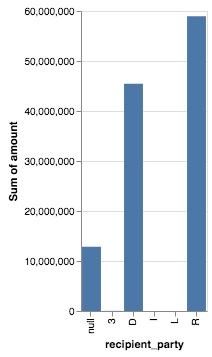

In [34]:
c = alt.Chart(t[t.recipient_party, t.amount]).mark_bar().encode(
    x='recipient_party:nominal',
    y='sum(amount)'
)
c

In [43]:
alt.renderers.enable('extract-json')
c

<IPython.core.display.JSON object>